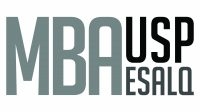

# Modelo de crédito


1. Colocando o carro na frente dos bois
    1. Rodando o modelo
    2. Avaliando o modelo
    3. Overfitting
2. Fluxo planejado
    1. Limpeza de dados
    2. Seleção de variáveis / redução de dimensionalidade
    3. Estratégia de validação cruzada
    4. treino do modelo
    5. Otimização dos parâmetros
    6. Avaliação do modelo

Objetivos:
- recapitular alguns dos principais temas do curso
- introduzir o pacote scikitlearn

## Índice <a name="topo"></a>

1. [Carregando a base](#1)
2. [Análise Univariada](#2)
3. [Limpeza de dados](#3)
4. [Análise bivariada](#4)
5. [Introdução ao scikitlearn](#5)

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from scipy.stats import ks_2samp

%matplotlib inline

## <span style="color:blue">1. Carregando os dados</span><a name="1"></a>

<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     

Este é um problema real de crédito, publicado pelo [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. Este desafio está publicado com o nome de "[Give me some credit](https://www.kaggle.com/c/GiveMeSomeCredit)" (Me dá um crédito, em tradução livre).  



Vamos checar nosso *working Directory*. O comando mágico %pwd mostra o *working directory*. O python pega arquivos daqui por padrão. O caminho do arquivo deve ser especificado caso o **.csv** não esteja no *working directory*.

In [3]:
# carregar dados
arquivo = '../../../Dados/cs-training.csv'
df = pd.read_csv(arquivo, index_col=0)

In [4]:
# Quantas linhas e colunas tem a base de dados?
df.shape

(150000, 11)

In [5]:
# Quais são as colunas?
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Nome            | Descrição                                         | Type  |
| ------------------------ |:---------------------------------------------------:| -----:|
| SeriousDlqin2yrs| **A pessoa incorreu em 90 dias de inadimplência ou pior** |S/N|
| RevolvingUtilizationOfUnsecuredLines| Saldo em rotativos sobre limite total |porcentagem|
| age|idade do muduário em anos|inteiro|
| NumberOfTime30-59DaysPastDueNotWorse|Número de atrasos 30 e 59.|inteiro|
| DebtRatio| Total em obrigações mensais sobre renda |porcentagem|
| MonthlyIncome|Renda mensal|real|
| NumberOfOpenCreditLinesAndLoans | Número de empréstimos em aberto  | inteiro |
| NumberOfTimes90DaysLate| Número atrasos em 90 dias ou mais | inteiro|
| NumberRealEstateLoansOrLines| Número de empréstimos imobiliários |inteiro|
| NumberOfTime60-89DaysPastDueNotWorse | Número atrasos entre 60-89 dias |inteiro|
| NumberOfDependents| Número de dependentes |inteiro|





## <span style="color:blue"> 2. Análise univariada</span><a name="2"></a>

<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     
Avaliar a distribuição das variáveis disponíveis através de histogramas e gráficos de barras.

<AxesSubplot:>

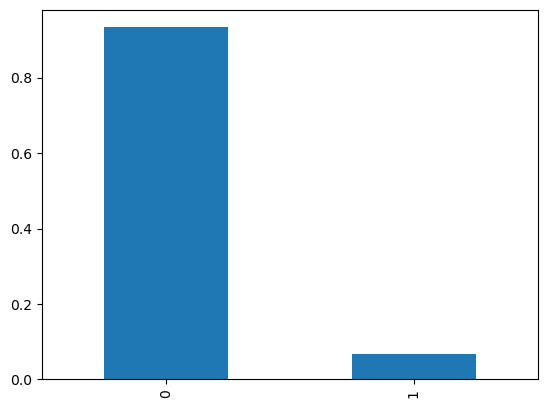

In [5]:
df['SeriousDlqin2yrs'].value_counts(normalize='True').plot.bar()

In [7]:
pd.DataFrame({'contagens':df['SeriousDlqin2yrs'].value_counts(),
              'pct':df['SeriousDlqin2yrs'].value_counts(normalize='True')},
             index=df['SeriousDlqin2yrs'].value_counts().index,             
            ).style.format(precision=2, decimal=',', thousands='.', 
                           formatter={'pct':'{:.1%}'})


,contagens,pct
0,139.974,"93,3%"
1,10.026,"6,7%"


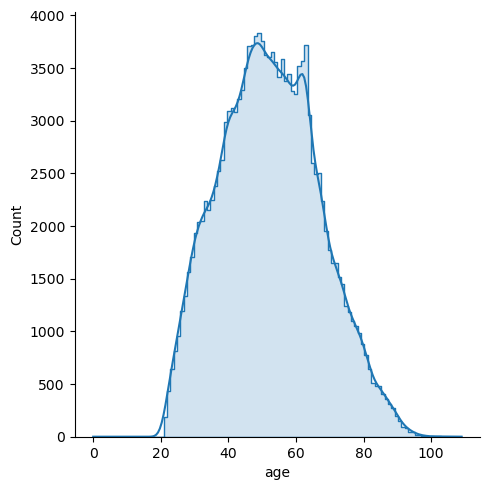

In [8]:
# Análise univariada
variavel = 'age'

sns.displot(df
            , x = variavel
            , bins = 110 # colunas do grafico
            , alpha = .2 # transparencia
            , kde = True # linha suavizada
            , element = 'step'
           )
plt.show()

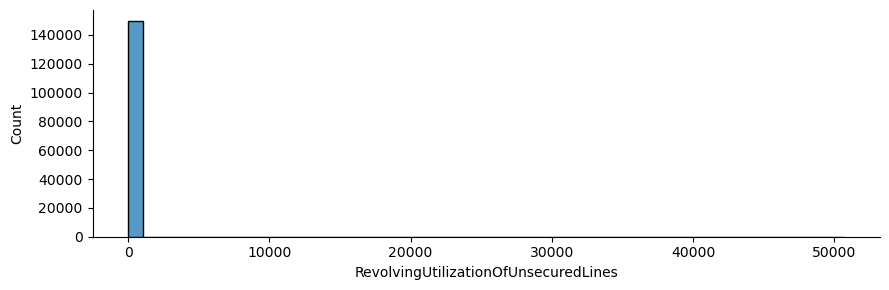

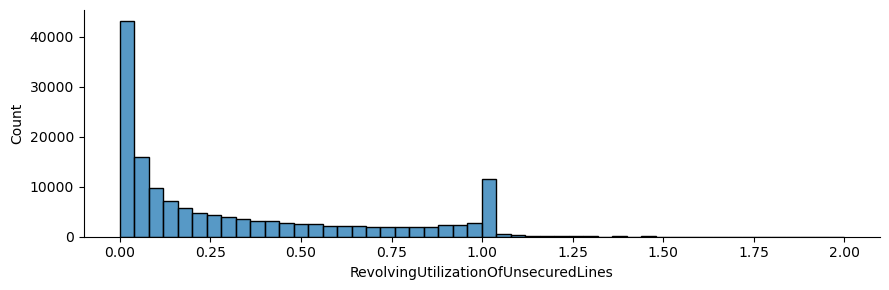

In [9]:
# Análise univariada
variavel = 'RevolvingUtilizationOfUnsecuredLines'
sns.displot(df
            , x = variavel
            , bins = 50
            , aspect = 3
            , height = 3)

sns.displot(df[df['RevolvingUtilizationOfUnsecuredLines']<2]
            , x = variavel
            , bins = 50
            , aspect = 3
            , height = 3)

In [10]:
df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


## <span style="color:blue"> 3. Limpeza de dados</span><a name="3"></a>


<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     

O que fazer com dados duplicados?

In [10]:
df.duplicated().sum()

609

Neste caso, entendemos que as duplicações foram geradas indevidamente na construção da tabela, vamos remover os duplicados.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Quantos missing cada vairável tem?
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

#### Substituindo valores missing

Valores *Missing* são outro ponto que costuma gerar polêmica. O procedimento recomendado é procurar entender por que foram gerados, e tomar uma decisão frente às causas e aos objetivos do modelo. No nosso caso, vamos assumir que os valores faltantes acabam sendo uma característica do cliente, e que permanecerá existindo e apresentando no futuro os mesmos comportamentos observados no passado. Assim, vamos tentar modelar os missings como um valor separado.

As variáveis que possuem valores missing possuem domínio em números positivos. Como pretendemos utilizar um algoritmo baseado em árvores de decisão, pode ser uma boa ideia substituir valores missing por negativos. É importante, no entanto, verificar se o fato gerador de valores faltantes permanece inalterado no momento da aplicação do modelo. 

In [13]:
# substituir missings por valores convenientes
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(-10000)
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(-1)

In [14]:
# Se o objeto é um data frame, o output fica mais bonitinho
pd.DataFrame(df.isna().sum())

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


## <span style="color:blue">4. Bivariadas</span><a name="4"></a>


<div style="text-align: right" 
     
[Voltar ao índice](#topo)
     

Abaixo vamos fazer um plot simples da variável resposta por uma variável explicativa arbitrária. Esse plot pode ser replicado para mais variáveis para obtermos uma análise descritiva completa.

A ideia é ter sempre uma variável qualitativa no eixo X, e a proporção (a média) da variável resposta no eixo Y. Se a variável X desejada for quantitativa, podemos categorizá-la.

Text(0, 0.5, 'Bad Rate em 2 anos')

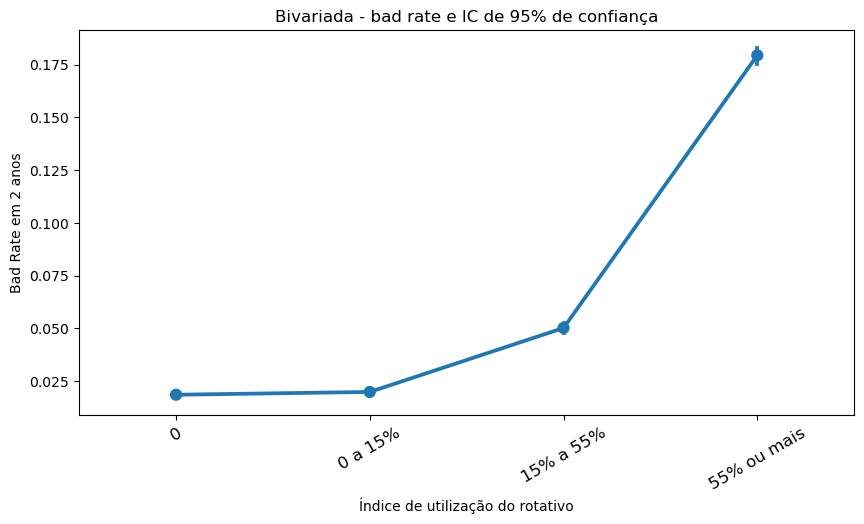

In [15]:
plt.rc('figure', figsize=(10, 5))

var = 'RevolvingUtilizationOfUnsecuredLines'
num_cat = 4
var_resp = 'SeriousDlqin2yrs'

#categorizar em percentis
cat_srs, bins = pd.qcut(df[var], num_cat, retbins=True, duplicates = 'drop')

# Gráfico de perfis de médias
ax = sns.pointplot(x=cat_srs, y=var_resp, data=df)

labels =['0', '0 a 15%', '15% a 55%', '55% ou mais']
ax.set_xticklabels(labels, rotation=30, fontsize='large')
ax.set_title('Bivariada - bad rate e IC de 95% de confiança')
ax.set_xlabel('Índice de utilização do rotativo')
ax.set_ylabel('Bad Rate em 2 anos')

## <span style="color:blue">5. Introdução ao *scikitlearn* </span><a name="5"></a>

<div style="text-align: right" 
     
[Voltar ao índice](#topo)

As principais bibliotecas do Python que fazem algoritmos de *data science* no Python são o statsmodels, que contém uma diversidade de métodos estatísticos, e o scikitlearn, que contém procedimentos de *machine learning*.

### Dividindo a base em treino e teste

A função ```train_test_split()``` do Scikit Learn depara uma parte da base para testes de forma bem prática. O percentual padrão é 25%, mas você pode alterar este e outros parâmetros da função. Consulte a documentação.

In [16]:
# Tirando a v. resposta da base de treinamento
# df.drop(columns='cat')
X = df.drop(columns=["SeriousDlqin2yrs"
#                      ,"cat"
                    ],axis = 1).copy()
y = df["SeriousDlqin2yrs"].copy()

# Tirando ID da base de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
128049,0.036187,48,1,0.280036,3320.0,3,0,1,1,2.0
108039,1.035153,39,0,0.971151,3500.0,11,0,2,0,2.0
134997,1.000000,63,1,0.580867,7400.0,6,4,3,1,0.0
98674,0.071873,91,0,0.005499,10000.0,6,0,0,0,1.0
38192,0.023289,57,0,0.009279,6250.0,5,0,0,0,0.0


### Rodar o modelo
Aqui vamos rodar uma RandomForest, por ser relativamente simples de se usar e ter resultados razoáveis em geral.

In [19]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=5
                             , ccp_alpha = .005
                             , class_weight = "balanced")
clf.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.005, class_weight='balanced', n_estimators=5)

## Interpretando o modelo

### Importâncias de variáveis

Algoritmos baseados em árvore calculam a *variable importance*, uma medida de quanto cada variável é importante na classificação final baseado em quantas vezes a variável foi utilizada em uma quebra e qual a redução da impureza devido à variável.

<AxesSubplot:>

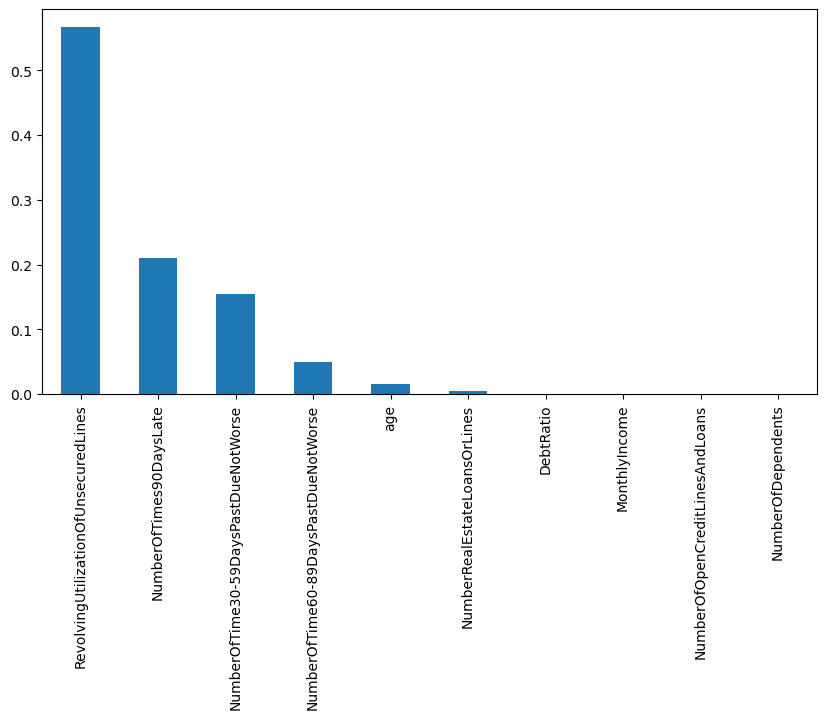

In [229]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot.bar()

### LIME

Lime significa *local interpretable model-agnostic explanations*. Um algoritmo que realiza uma 'perturbação' nas variáveis explicativas, e ajusta 'localmente' um coeficiente de regressão para explicar impactos de alterações dessa variável em uma vizinhança 'próxima' aos valores observados.

O LIME fornece explicações por indivíduo.

In [230]:
from lime import lime_tabular

In [231]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values, 
    feature_names=X.columns, 
    class_names=["Bom", "Mau"])

exp=explainer.explain_instance(
    X_train.iloc[-20].values, 
    clf.predict_proba
)
# clf.predict_proba

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [232]:
exp.show_in_notebook()

### SHAP

SHAP é uma medida de contribuição inventada por [Lloyd Shapley](https://en.wikipedia.org/wiki/Lloyd_Shapley), significa *SHapley Additive exPlanations*. Uma metodologia que calcula as contribuições de cada variável em um modelo dadas as demais variáveis.

Talvez você precise instalar este pacote. Em geral é bastante simples usando:
```python
pip install shap
```

O pacote tem uma documentação muito boa e muito completa, além de existir muito material bom a respeito na internet. Consulte a [documentação](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html).

O algoritmo baseia-se em avaliar a previsão de cada observação sob um modelo *completo*, e **sem** cada uma das variáveis. Então ele avalia a contribuição da variável, dado o seu valor. A análise pode ser feita também avaliando os valores das demais variáveis.

Primeiro vamos trazer um objeto com a função ```TreeExplainer(clf)```, em que o ```clf``` é o modelo de árvore que estamos utilizando. Em seguida, vamos rodar o algoritmo com o ```explainer(X)``` em que ```X``` são os dados.

em seguida, podemos utilizar uma série de métodos para fazer diferentes análises.

In [21]:
import shap

# Quando estamos utilizanod o jupyter, esse script é necessário
shap.initjs()

In [22]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer(X)

In [23]:
shap_values[:,:,0].shape

(149391, 10)

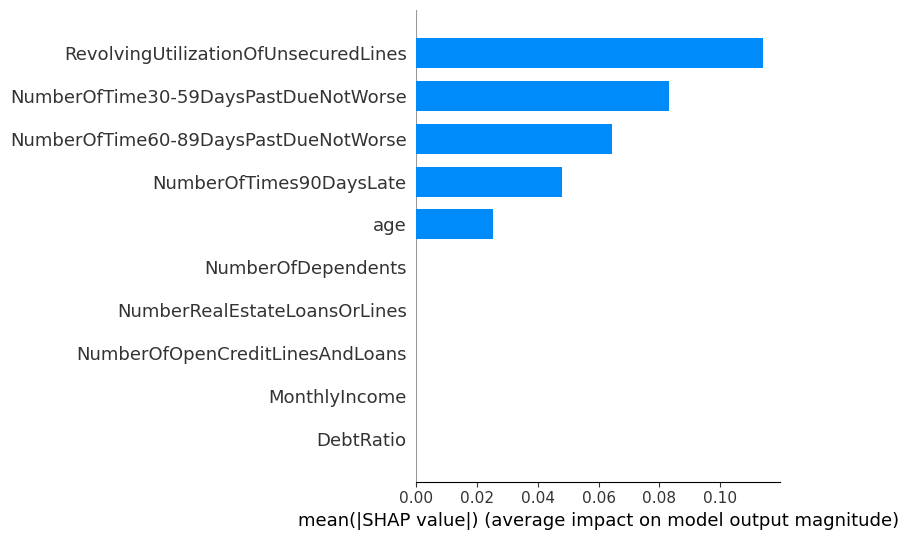

In [24]:
shap.summary_plot(shap_values[:,:,0], X, plot_type='bar')

#### Gráfico de forças
É um gráfico bem popular que mostra as influências de cada variável para uma dada observação com intensidade e sentido.

In [30]:
idx=750
shap.force_plot(
    explainer.expected_value[0],
    shap_values[idx,:,1].values,
    X.iloc[idx],
)

In [28]:
X.iloc[20]

RevolvingUtilizationOfUnsecuredLines        0.200923
age                                        43.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.430046
MonthlyIncome                           12300.000000
NumberOfOpenCreditLinesAndLoans            10.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                2.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          0.000000
Name: 21, dtype: float64

#### Gráfico de forças em formato de cascata

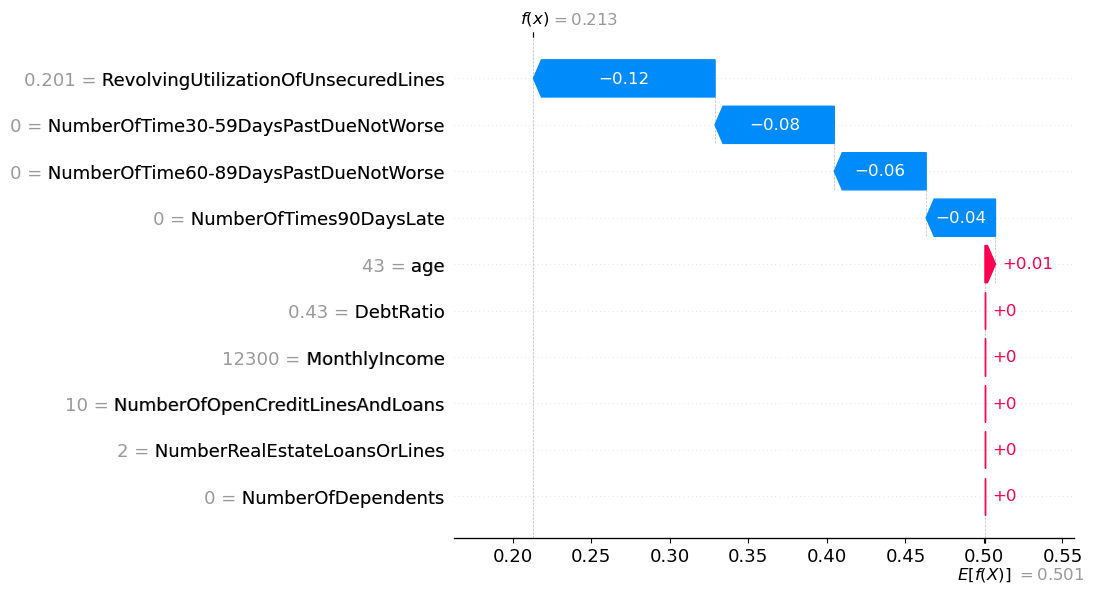

In [31]:
shap.plots.waterfall(shap_values[20,:,1], max_display=14)

#### Gráfico de "enxame" (*beeswarm*)

Essa análise pode consumir bastante tempo. Por este motivo, vamos fazer uma amostra balanceada de bons e maus das variáveis explicativas, em seguida vamos fazer uma amostragem bem menor para mostrar o gráfico.

In [33]:
X_bal = pd.concat([X[y!=1].sample(y.sum()), X[y==1]], axis=0)
X_bal.shape

(20018, 10)

Exact explainer: 501it [00:35, 11.33it/s]                                                                                                                       


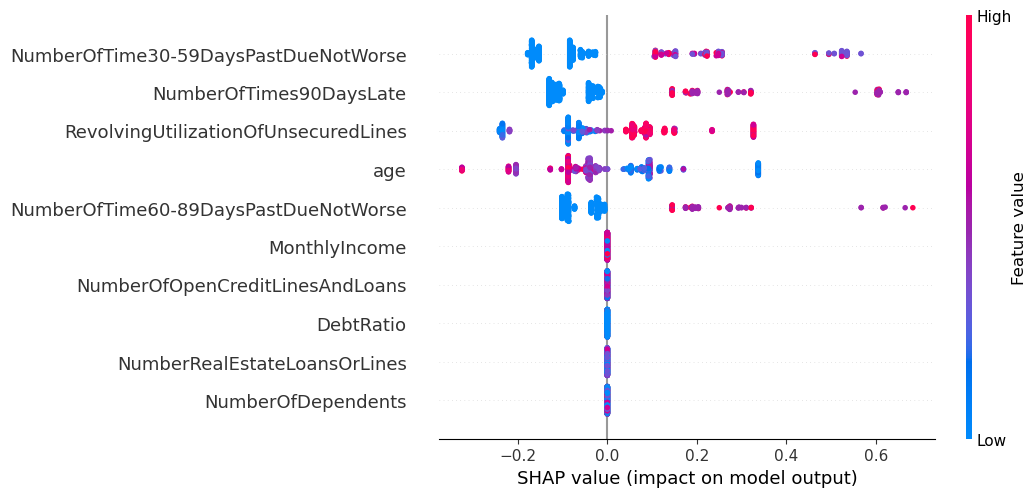

CPU times: user 28.7 s, sys: 3.5 s, total: 32.2 s
Wall time: 36.4 s


In [34]:
%%time
X100 = shap.utils.sample(X_bal, 500)
explainer_ebm = shap.Explainer(clf.predict, X100)
shap_values_ebm = explainer_ebm(X100)
shap_values = explainer(X100)
shap.plots.beeswarm(shap_values_ebm)

#### Relacionando as influências com outras características

Observe que o SHAP calcula valores SHAP por variável. Vamos utilizar isto nas próximas análises.

In [39]:
shap_values_ebm[:,"RevolvingUtilizationOfUnsecuredLines"]

.values =
array([-0.2345    , -0.06383333, -0.2345    ,  0.055     ,  0.12666667,
        0.08316667, -0.037     ,  0.06      ,  0.06083333,  0.32666667,
        0.32666667, -0.21866667,  0.076     , -0.2345    ,  0.05533333,
        0.06083333,  0.08316667, -0.08733333,  0.14966667,  0.08666667,
       -0.2345    , -0.06383333,  0.32666667, -0.06383333, -0.08733333,
       -0.08733333,  0.14966667, -0.06383333, -0.06383333, -0.2345    ,
        0.08666667,  0.0425    , -0.2345    , -0.06383333, -0.08733333,
       -0.0725    ,  0.14966667, -0.2345    ,  0.23416667,  0.08666667,
       -0.08733333, -0.24083333, -0.21866667,  0.09183333,  0.05666667,
        0.08683333,  0.05533333,  0.32666667,  0.06      , -0.2345    ,
        0.0005    , -0.048     , -0.08733333, -0.04583333,  0.06      ,
       -0.08733333,  0.05666667, -0.08733333,  0.076     , -0.08733333,
        0.08683333, -0.048     ,  0.06      ,  0.14966667,  0.32666667,
        0.09216667,  0.08316667, -0.0225    , -0.027  

Aqui vamos precisar de um filtro, para remover outliers dessa variável ou não vamos conseguir analisar.

In [44]:
filt = (shap_values_ebm[:,"RevolvingUtilizationOfUnsecuredLines"].data<2)
filt
# shap_values_ebm[filt,"RevolvingUtilizationOfUnsecuredLines"]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

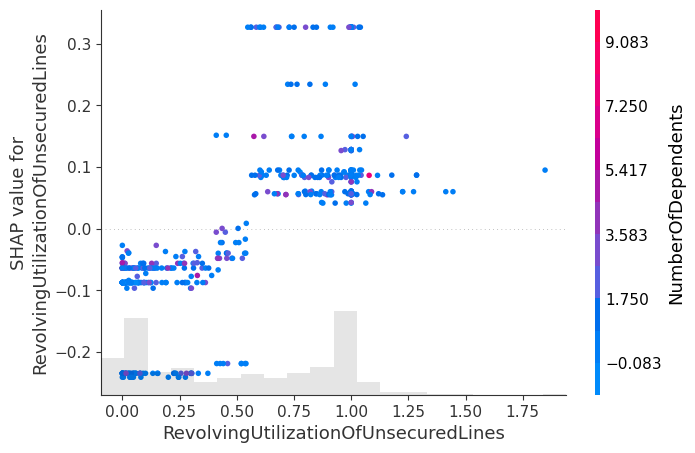

In [56]:
shap.plots.scatter(shap_values_ebm[filt,"RevolvingUtilizationOfUnsecuredLines"], 
                   color=shap_values[filt,9,0])

### Métricas de qualidade do modelo
amos calcular aqui acurácia (com ponto de corte padrão = 50%)m, KS, AUC e Gini.

In [34]:
ks = ks_2samp(y_prob[y_test == 1], y_prob[y_test != 1]).statistic
ks

0.5385302665893534

In [35]:
# Acurácia
acc = metrics.accuracy_score(y_test, y_pred)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1

print('Acurácia: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(acc*100, auc*100, gini*100))

Acurácia: 67.79% 
AUC: 84.10% 
GINI: 68.20%


/Users/juka42/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


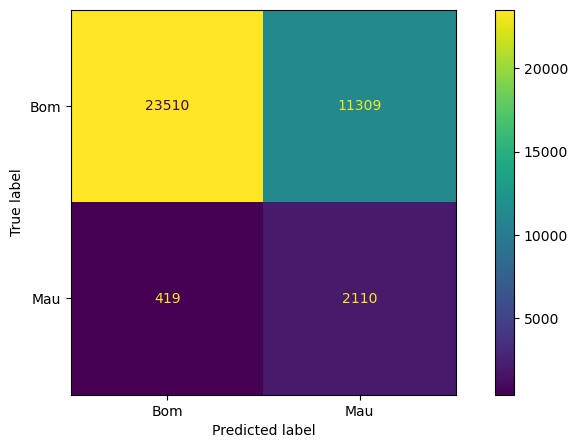

In [54]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Bom', 'Mau'])

In [ ]:
(25399 + 1966)/(25399 + 1966 + 494 + 9489)